# Сборный проект

## Описание проекта

**Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.**

**Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.**

**В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».**

[Шаг 1. Откройте файл с данными и изучите общую информацию](#title1)

[Шаг 2. Подготовьте данные](#title2)

[Шаг 3. Проведите исследовательский анализ данных](#title3)

[Шаг 4. Составьте портрет пользователя каждого региона](#title4)

[Шаг 5. Проверьте гипотезы](#title5)

[Шаг 6. Напишите общий вывод](#title6)

**Библиотеки**

In [1]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
from scipy import stats as st
from statistics import variance


import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import plotly.express as px

In [3]:
!pip install featexp
from featexp import get_univariate_plots

### <a id="title1">Шаг 1. Откройте файл с данными и изучите общую информацию</a>

In [4]:
try:
    df = pd.read_csv(r"C:\Users\Aleksandr\Downloads\games.csv")
except:
    df = pd.read_csv("/datasets/games.csv")
print(f'Shape data is {df.shape}')

Shape data is (16715, 11)


In [5]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


In [8]:
print('список колонок:', df.columns)

список колонок: Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


**Информация получена, есть числовые, строковые значения, присутствует пропуски в данных, всего 11 колонок и 16715 строкю**

### <a id="title2">Шаг 2. Подготовьте данные</a>


**2.1 Замените названия столбцов (приведите к нижнему регистру)**

In [9]:
df.columns = df.columns.str.lower()
print('проверим себя' , df.columns)

проверим себя Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


**2.2 Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему**

In [10]:
df['year_of_release'] = df['year_of_release'].astype('Int32')

**Убираем float, поскольку из названия колонки понятно, что это год, int 32 для экономии места =)**

In [11]:
df.head().style.highlight_null()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.360000,28.960000,3.770000,8.450000,76.000000,8,E
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.580000,6.810000,0.770000,nan,nan,nan
2,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.790000,3.290000,82.000000,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.610000,10.930000,3.280000,2.950000,80.000000,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.890000,10.220000,1.000000,nan,nan,nan


**2.3 Обработайте пропуски при необходимости**

In [12]:
print('Количество пропущенных значений:')

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Количество пропущенных значений:
name - 0%
platform - 0%
year_of_release - 2%
genre - 0%
na_sales - 0%
eu_sales - 0%
jp_sales - 0%
other_sales - 0%
critic_score - 51%
user_score - 40%
rating - 40%


**Топ по NAN:**
- critic_score - 51%
- user_score - 40%
- rating - 40%
- year_of_release - 2%

**Возможные причины:**
- Ошибки при записях (чел.фактор)
- Ошибки при миграции данных из SQL формата в csv и.т.д.

**теперь посмотрим на последние две колонки датасета**

In [13]:
print('уникальные значения', df['user_score'].unique())

уникальные значения ['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


**Прогуглив: tbd имеет несколько расшифровок. Нас же интересует игровая сфера. 'To Be Determined' - 'Будет определено'.**

In [14]:
df['user_score'] = df['user_score'].replace('tbd', np.nan, regex=True)
df['user_score'] = df['user_score'].astype(float)
print('убедимся:', df['user_score'].dtype)

убедимся: float64


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно сделана замена "tbd" на NaN. Это практически аналог пропусков.</font>

In [15]:
print('уникальные значения', df['rating'].unique())

уникальные значения ['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


- critic_score - поставим этим играм рейтинг -1 (поставив -1, мы  не перемешаем игры с NaN и с реально нулевым рейтингом);
 
- rating - ESRB - может быть, рейтинга от неё нет. Допустим невозможно дать рейтинг игре, посчитав его как среднее рейтингов игр того же жанра. Поставим "No_ESRB";
- user_score - ранее не было сервисов, которые собирали бы рейтинги игроков. Поэтому и присутствуют пропуски. Поступим так же, как и со столбцом critic_score.

In [16]:
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].fillna(-1)

In [17]:
df['rating'] = df['rating'].fillna('No_ESRB')

In [18]:
print('Количество пропущенных значений:')

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Количество пропущенных значений:
name - 0%
platform - 0%
year_of_release - 2%
genre - 0%
na_sales - 0%
eu_sales - 0%
jp_sales - 0%
other_sales - 0%
critic_score - 0%
user_score - 0%
rating - 0%


- year_of_release (год выпуска игры) имеет 2% пропусков. Данных достаточно для анализа, поэтому оставляем как есть.

In [19]:
print('Явные дубликаты', df.duplicated().sum())

Явные дубликаты 0


In [20]:
print('дубликаты', df.loc[:, 'name':'year_of_release'].duplicated().sum())
display(df[df[['name','platform', 'year_of_release']].duplicated(keep = False)])
df = df.drop(index=[14244,16230])
print('дубликаты', df.loc[:,'name':'year_of_release'].duplicated().sum())
print('Явные дубликаты', df.duplicated().sum())

дубликаты 2


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,-1.0,-1.0,No_ESRB
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,-1.0,-1.0,No_ESRB
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


дубликаты 0
Явные дубликаты 0


**Вывод: Было выполнено следующее**

- Название столбцов было приведено к нижнему регистру
- Восстановлены пропуски в строках.
- Удалены строки без нужных данных.
- Добавлен столбец суммарных продаж.

In [21]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.shape

(16713, 12)

### <a id="title3">Шаг 3. Проведите исследовательский анализ данных</a>

**3.1 Посмотрим на данные**

Распределение всех числовых данных:


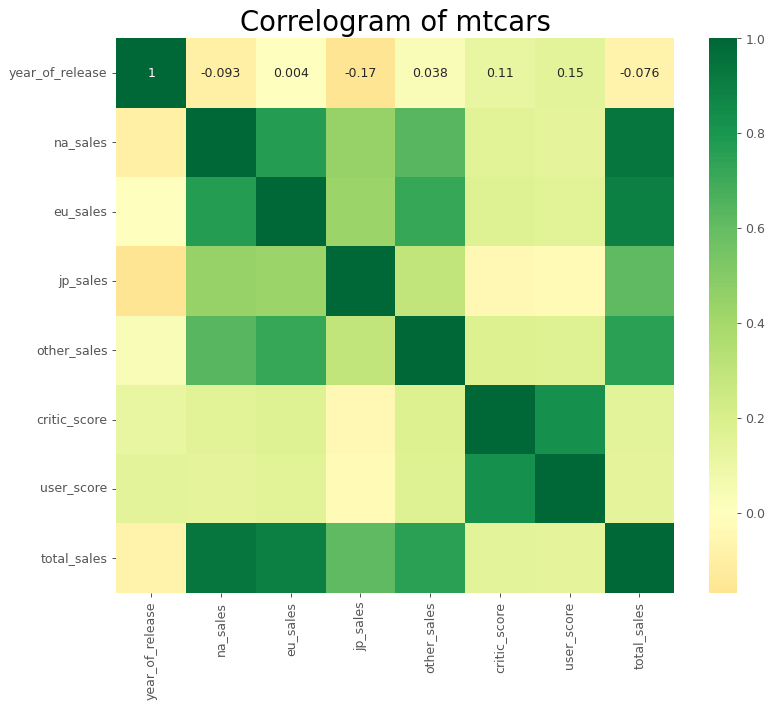

In [22]:
print('Распределение всех числовых данных:')
 
plt.figure(figsize=(10,8), dpi= 90)
sns.heatmap(df.select_dtypes(include=[np.number]).corr(),
            xticklabels=df.select_dtypes(include=[np.number]).corr().columns,
            yticklabels=df.select_dtypes(include=[np.number]).corr().columns, 
            cmap='RdYlGn',
            center=0,
            annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**3.2 Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды**

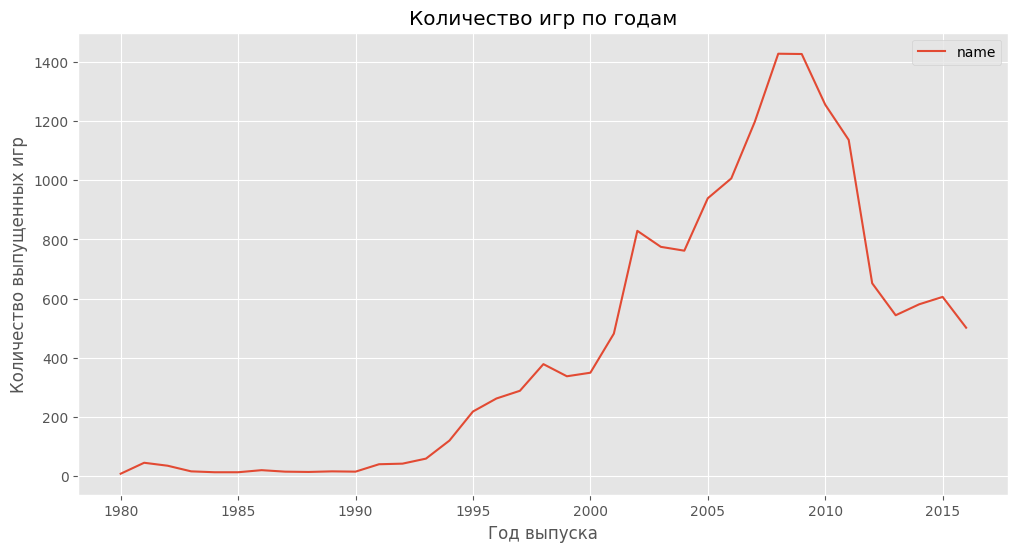

In [23]:
df_year = df.pivot_table(index='year_of_release',
                         values='name', 
                         aggfunc='count').plot(
    figsize=(12,6),
    title='Количество игр по годам',
    xlabel = "Год выпуска",
    ylabel = "Количество выпущенных игр"
)

**C 90-х годов количество игр начинает ежегодно расти быстрыми темпами. Можно попробовать это объяснить развитием компьютеров. Технологий game дизайна, граф-мощностей, двигателей на них. Отправной точкой нашего путешествия станет весна 2008 года. Тогда состоялся релиз Grand Theft Auto 4, ставшей настоящей революцией. Резко изменившийся тон игры в сравнении с предшественниками, огромный и проработанный открытый мир, а также небывалый реализм заставили миллионы геймеров мгновенно влюбиться в приключения Нико Белика. Конкуренты «Рок-звёзд» тоже не смогли оставаться в стороне и начали массово копировать различные элементы «четвёрки» в свои игры.**

**Именно в GTA 4 впервые появились случайные игровые события, GPS на миникарте и полнофункциональный мобильный телефон у главного героя. Так или иначе, всё это позже неоднократно появлялось в разных играх, но до совершенства все аспекты могли довести только сами «рокстаровцы», чем они и занялись в следующих работах.
2009 год ознаменовался ещё одним знаковым событием — анонсом OnLive. Представьте, на консолях только начинает зарождаться нормальный мультиплеер, новое поколение мобильной связи, 4G, появится лишь через год, интернет во многих странах далёк от идеала и тут, как гром среди ясного неба, происходит анонс платформы для облачного гейминга. Теперь не нужны консоли, мощные ПК и прочие устройства. Берите старенький ноутбук на Windows XP и отправляйтесь играть в новинки! Только не забудьте оплатить подписку. Предложение казалось крайне заманчивым, ведь 10 баксов за доступ к большой игровой библиотеке гораздо выгоднее, чем тратиться на приставки и обновления компьютера.**

**В 2010 году состоялся релиз инновационной платформы, но, к сожалению, всё оказалось не так радужно, как нам обещали во время презентаций. OnLive обладал небольшим количеством игр, да и крупные издатели не спешили включать свои проект в библиотеку. С этим можно было бы смириться, если бы не технические проблемы. Постоянные разрывы соединения, рассыпающаяся картинка, колоссальные требования к скорости интернета. Всё это не давало ни единого шанса на то, что когда-нибудь всё наладится.**

**Общественность похоронила OnLive почти сразу, но внутри команды ещё шли работы над восстанием из пепла. Увы, камбэка не случилось. В 2015 году все сервера были закрыты, а наработки и патенты выкупила Sony, чтобы потом выпустить свой облачный сервис — PlayStation Now. В этой истории много подводных камней и интересных поворотов.
Помните, была такая карманная консоль PSP? Даже заядлые ПК-бояре, скорее всего, о ней слышали или даже щупали собственными руками. Так вот, в 2012 году состоялся релиз ещё одной портативной консоли Sony.**


**3.3 Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы**

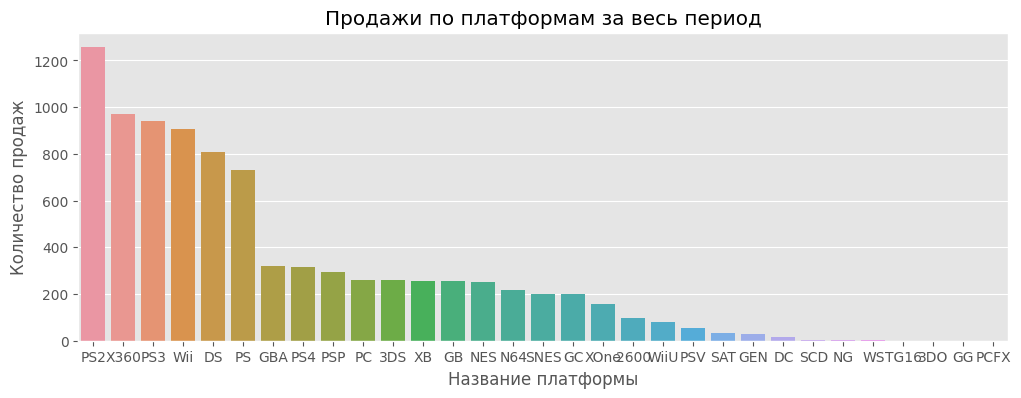

In [24]:
df_platform = df.pivot_table(index='platform', 
                             values='total_sales', 
                             aggfunc='sum').sort_values(by='total_sales',
                                                        ascending=False)

plt.figure(figsize=(12,4))
sns.barplot(x=df_platform.index,y=df_platform['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")
plt.show()

In [25]:
#аномалия
df_find_anamaly = df[(df.platform == 'DS') & (df.year_of_release == 1985)]
display(df_find_anamaly)
df = df.drop (index= 15957)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-1.0,-1.0,No_ESRB,0.02


**Xbox или Playstation? Вечный спор**
https://dzen.ru/a/Y-8-hQLCIgzC-GN6

In [26]:
df.groupby(
    'platform'
)['total_sales'].sum().to_frame(
    'total_sales'
).sort_values(by='total_sales', ascending=False).head(6)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.64
Wii,907.51
DS,806.10
PS,730.86


In [27]:
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

**Возьмём первые 6 платформ и посмотрим их годовые динамики**

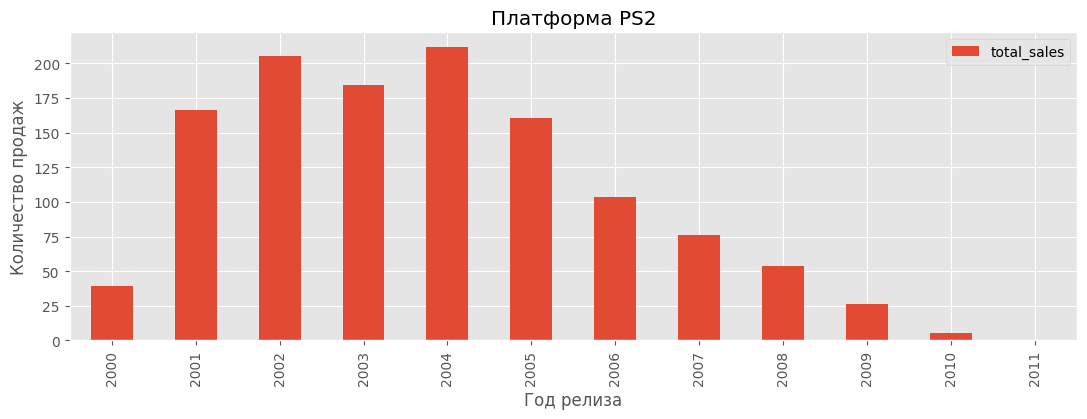

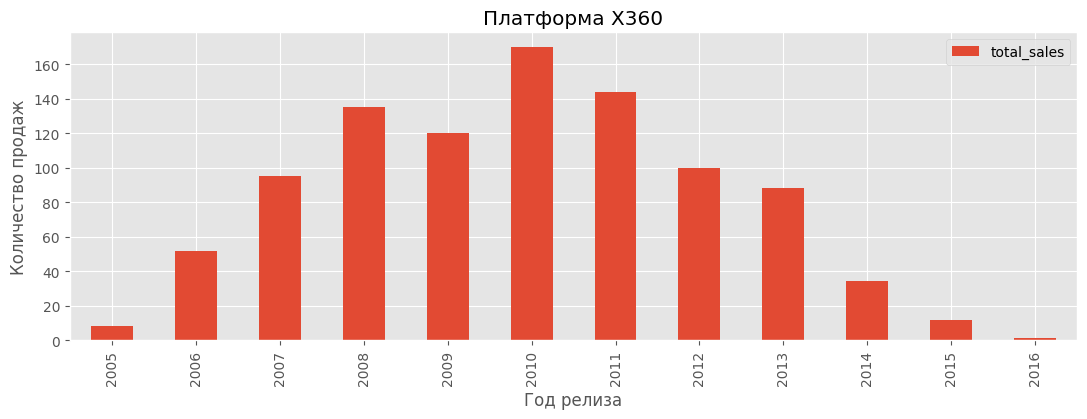

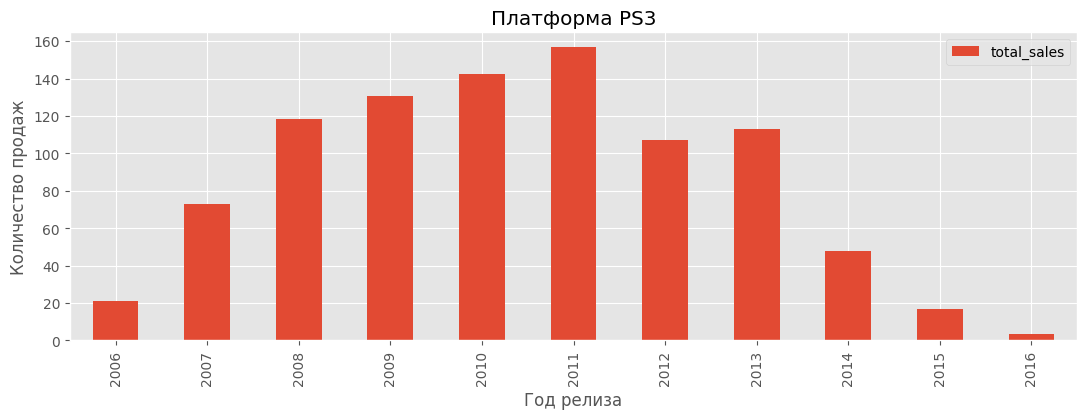

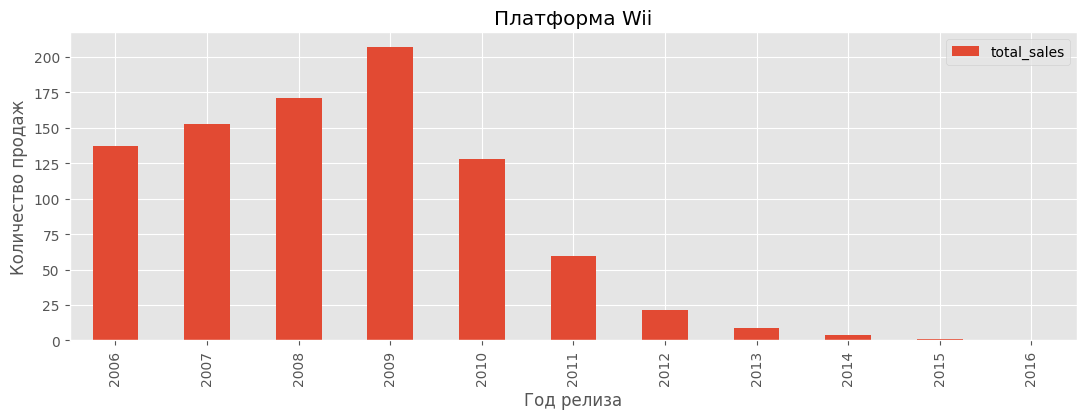

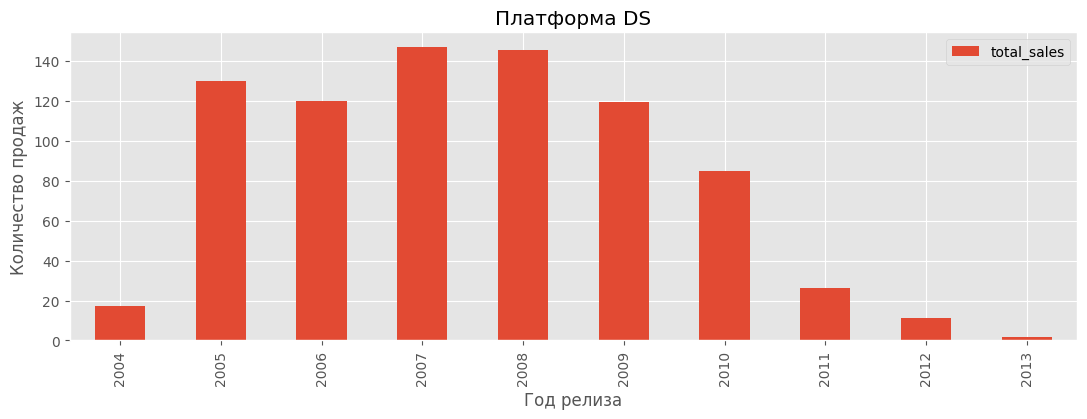

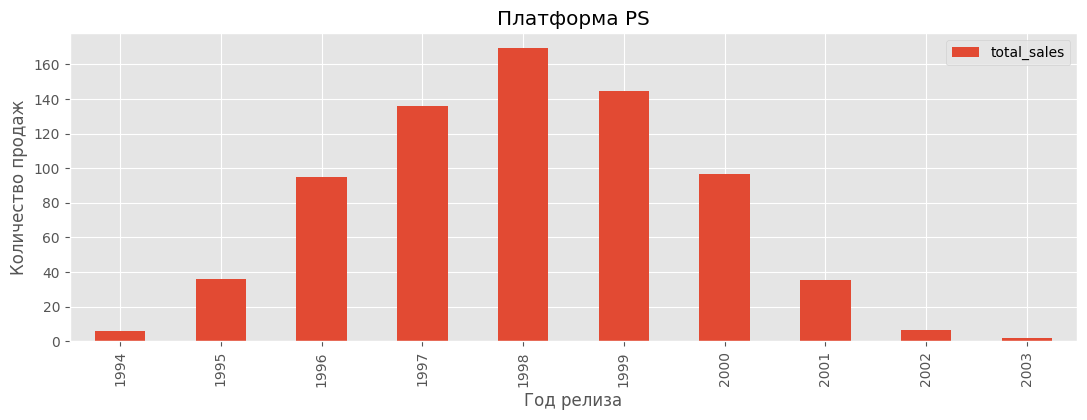

In [28]:
for i in top_platforms:
    df[df['platform'] == i].pivot_table(index='year_of_release',
                                        values='total_sales',
                                        aggfunc='sum').plot( kind='bar', 
                                                            figsize=(13,4))
   # plt.title(i)
    plt.title('Платформа '+ i)    
    plt.ylabel("Количество продаж")
    plt.xlabel("Год релиза")


**Cредний период существования платформ длится 8-10 лет. 6-ка по продажам за всё время платформ в датасете теряет в продажах к 2016 году. Вот список, что дошло до 2024 года РS4, PC, Nintendo 3DS, XBOX One, Nintendo Wii U, PlayStation Vita.** 

In [29]:
df = df.copy() 
time_life = df.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

правда цикл примерно 7 лет.

**Производители не прибегают к кроссплатформенной миграции игр и в 2024 году малая часть мигрирует. Выгодно изобретать все заново.**

**3.4 Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.**

In [30]:
period_df = df.query('year_of_release > 2012')
period_df 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,No_ESRB,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,No_ESRB,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,No_ESRB,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,No_ESRB,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,No_ESRB,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,No_ESRB,0.01


**3.5 Не учитывайте в работе данные за предыдущие годы.
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.**

In [31]:
list_of_top_10 = period_df.groupby(
    'platform'
)['total_sales'].sum().to_frame(
    'total_sales'
).sort_values(by='total_sales', ascending=False)
list_of_top_10 = list_of_top_10.reset_index()
list_of_top_10.head(10)

list(list_of_top_10.platform)[:10]

['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP']

**топ 10**

**3.6 Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.**

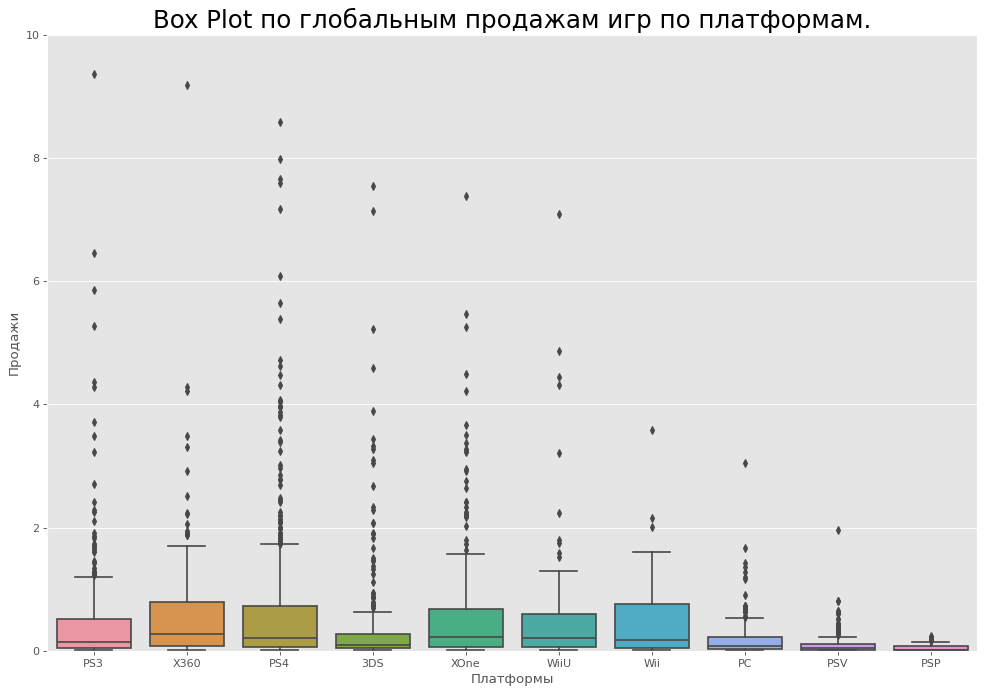

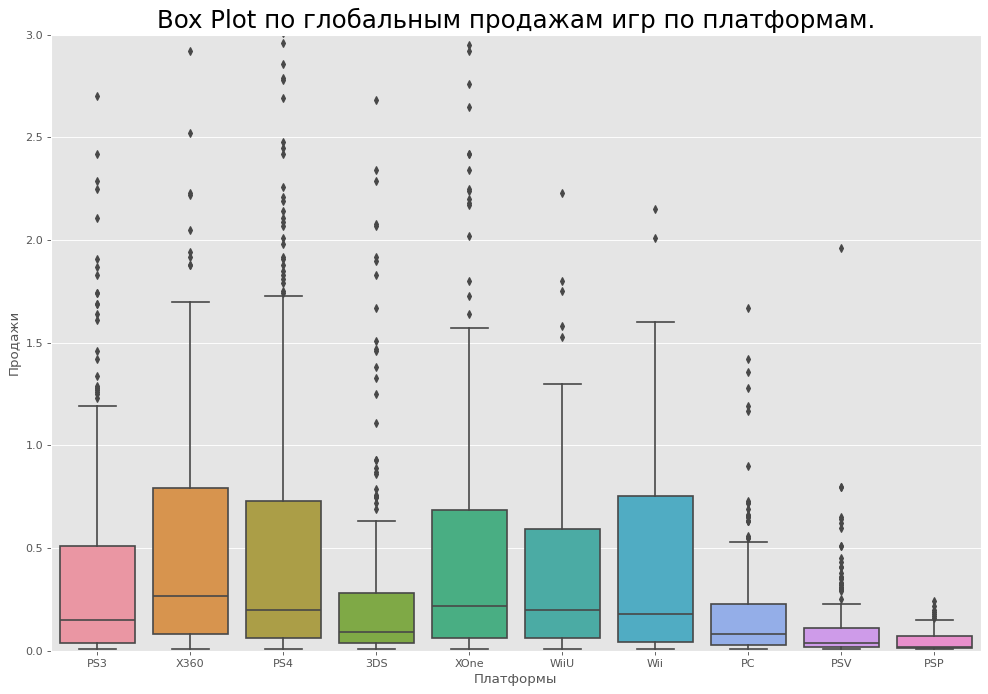

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,303.000000,189.000000,345.000000,392.000000,67.000000,358.000000,23.000000,115.000000,186.000000,247.000000
mean,0.472772,0.208624,0.525884,0.801378,0.052239,0.092151,0.593913,0.562000,0.735484,0.645020
std,1.381347,0.352304,1.451939,1.609456,0.059768,0.153816,0.915432,1.038778,1.663275,1.036139
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.040000,0.030000,0.040000,0.060000,0.015000,0.020000,0.045000,0.060000,0.080000,0.060000
50%,0.090000,0.080000,0.150000,0.200000,0.020000,0.040000,0.180000,0.200000,0.265000,0.220000
75%,0.280000,0.230000,0.510000,0.730000,0.070000,0.110000,0.755000,0.595000,0.795000,0.685000
max,14.600000,3.050000,21.050000,14.630000,0.240000,1.960000,3.580000,7.090000,16.270000,7.390000


In [32]:
games_platforms = period_df[period_df[
    'platform'
].isin(list(list_of_top_10.platform[:10]))]

# Draw Plot
plt.figure(figsize=(15,10), dpi= 80)
ax = sns.boxplot(x='platform', y='total_sales',
                 data=games_platforms)

# Decoration
plt.title('Box Plot по глобальным продажам игр по платформам.', fontsize=22)
ax.set_ylim(0,10)
plt.ylabel('Продажи')
plt.xlabel('Платформы')
plt.show()

# Draw Plot
plt.figure(figsize=(15,10), dpi= 80)
ax = sns.boxplot(x='platform', y='total_sales',
                 data=games_platforms)

# Decoration
plt.title('Box Plot по глобальным продажам игр по платформам.', fontsize=22)
ax.set_ylim(0,3)
plt.ylabel('Продажи')
plt.xlabel('Платформы')
plt.show()


games_platforms.groupby('platform')['total_sales'].describe().T

**Исходя из графиков видно, что медиана протекает у всех по-разному. Больше всех продаж у X360, PS3, Wii. Однако Xbox One и PlayStation 4 позднее остальных вышли на рынки. Часть стран увидела их в конце 2013, часть только во второй половине 2014. Этим можно объяснить малый по сравнению с топом объем продаж.**

**3.7 Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.**

**Таблица анализа силы корреляции связи между переменными**

**Значение:**

- от 0 до 0,3 (очень слабая),
- от 0,3 до 0,5 (слабая),
- от 0, 5 до 0,7 (средняя),
- от 0,7 до 0, 9 (высокая),
- от 0,9 до 1 (очень высокая).

Kорреляция между  отзывами критиков и продажами PS4 =  0.40656790206178123
Kорреляция между игроков отзывами и продажами PS4 =  -0.03195711020455644


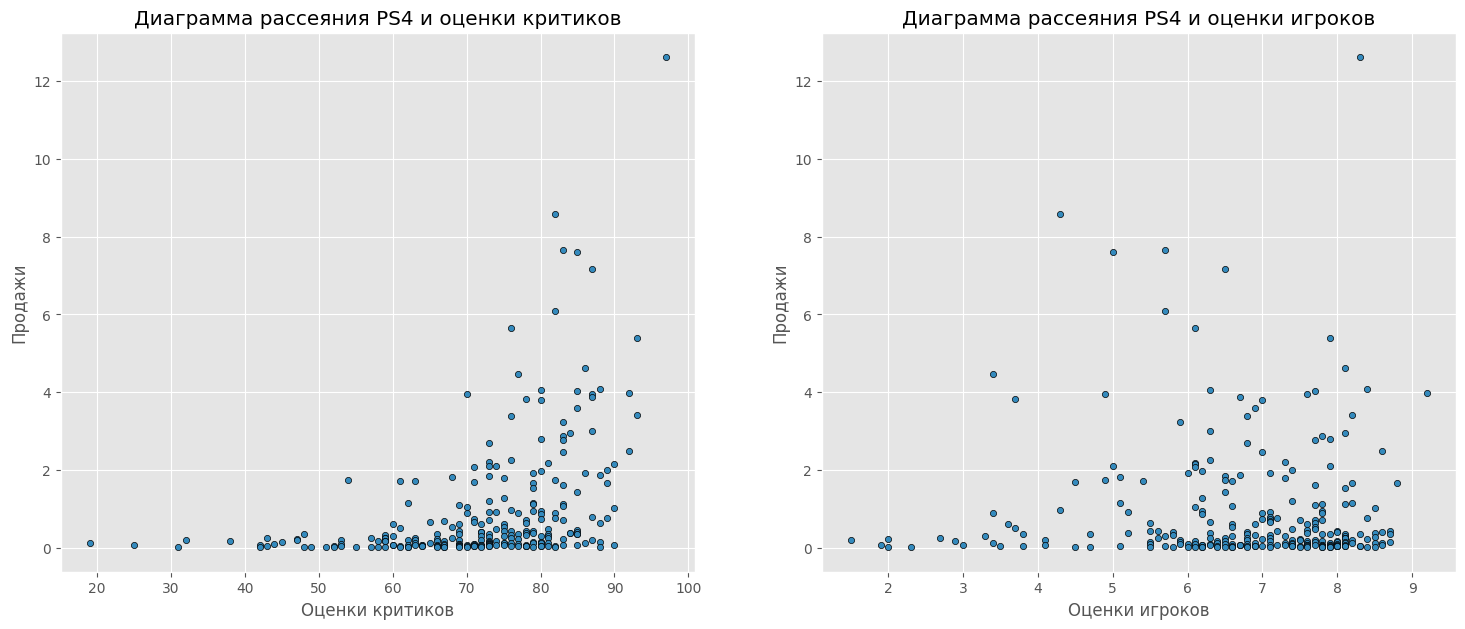

In [33]:
game_PS4_critic_score = period_df[(period_df['platform'] == 'PS4')&(period_df['critic_score']!= -1)]
game_PS4_user_score = period_df[(period_df['platform'] == 'PS4')&(period_df['user_score']!= -1)]

fig, axis = plt.subplots(1,2, figsize=(18,7))

game_PS4_critic_score.plot(kind='scatter',
                           ax=axis[0],
                           x='critic_score',
                           y='total_sales',
                           xlabel = 'Оценки критиков',
                           ylabel = 'Продажи',
                           title = 'Диаграмма рассеяния PS4 и оценки критиков',
                           ec='black')

game_PS4_user_score.plot(kind='scatter',
                         ax=axis[1],
                         x='user_score',
                         y='total_sales',
                         xlabel = 'Оценки игроков',
                         ylabel = 'Продажи',
                         title = 'Диаграмма рассеяния PS4 и оценки игроков',
                         ec='black')




print('Kорреляция между  отзывами критиков и продажами PS4 = ', 
      game_PS4_critic_score['critic_score'].corr(game_PS4_critic_score['total_sales']))
print('Kорреляция между игроков отзывами и продажами PS4 = ', 
      game_PS4_user_score['user_score'].corr(game_PS4_user_score['total_sales']))

Kорреляция между отзывами критиков и продажами 3DS =  0.3570566142288104
Kорреляция между  отзывами игроков и продажами 3DS =  0.24150411773563005


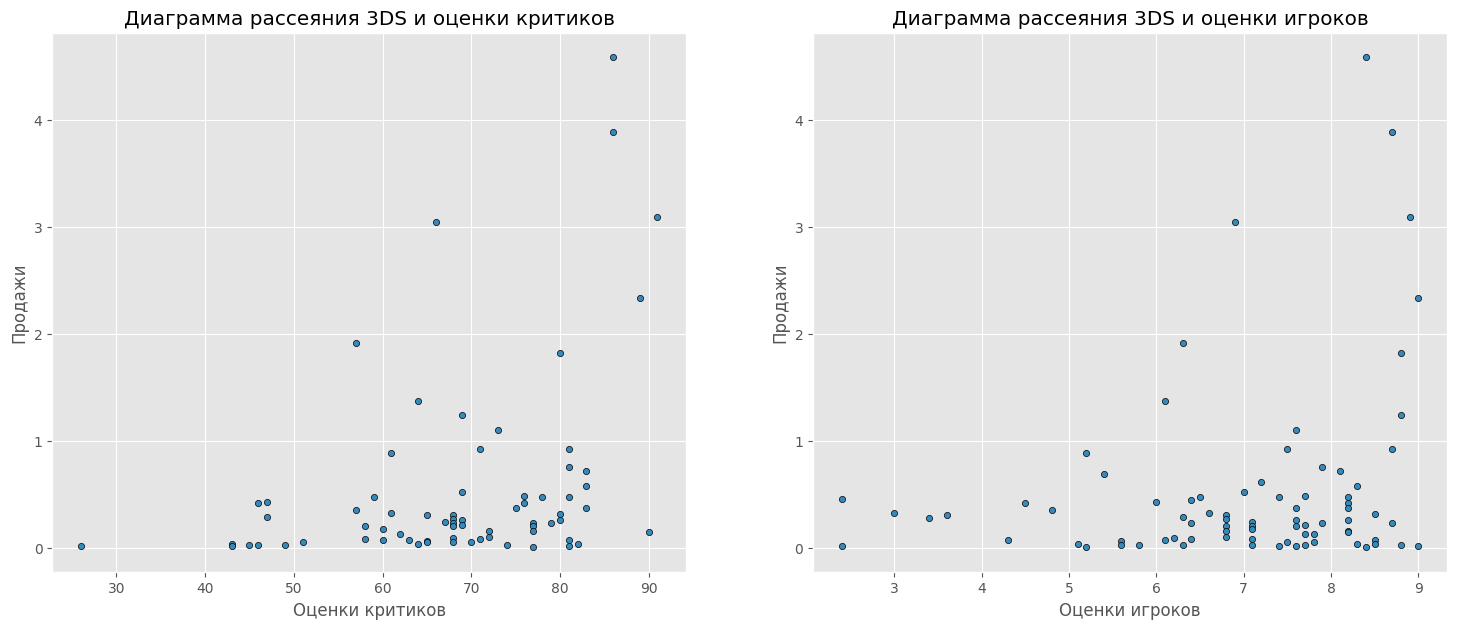

In [34]:
game_3DS_critic_score = period_df[(period_df['platform'] == '3DS')&(period_df['critic_score']!= -1)]
game_3DS_user_score = period_df[(period_df['platform'] == '3DS')&(period_df['user_score']!= -1)]

fig, axis = plt.subplots(1,2, figsize=(18,7))

game_3DS_critic_score.plot(kind='scatter',       
                           ax=axis[0], 
                           x='critic_score',
                           y='total_sales',
                           xlabel = 'Оценки критиков',
                           ylabel = 'Продажи',
                           title = 'Диаграмма рассеяния 3DS и оценки критиков',
                           ec='black')


game_3DS_user_score.plot(kind='scatter',
                         ax=axis[1],
                          x='user_score',
                          y='total_sales',
                         xlabel = 'Оценки игроков',
                         ylabel = 'Продажи',
                         title = 'Диаграмма рассеяния 3DS и оценки игроков',
                          ec='black')


print('Kорреляция между отзывами критиков и продажами 3DS = ',
      game_3DS_critic_score['critic_score'].corr(game_3DS_critic_score['total_sales']))
print('Kорреляция между  отзывами игроков и продажами 3DS = ',
      game_3DS_user_score['user_score'].corr(game_3DS_user_score['total_sales']))

Kорреляция между отзывами критиков и продажами PS3 = 0.33428533933719184
Kорреляция между отзывами игроков и продажами PS3 = 0.0023944027357567033


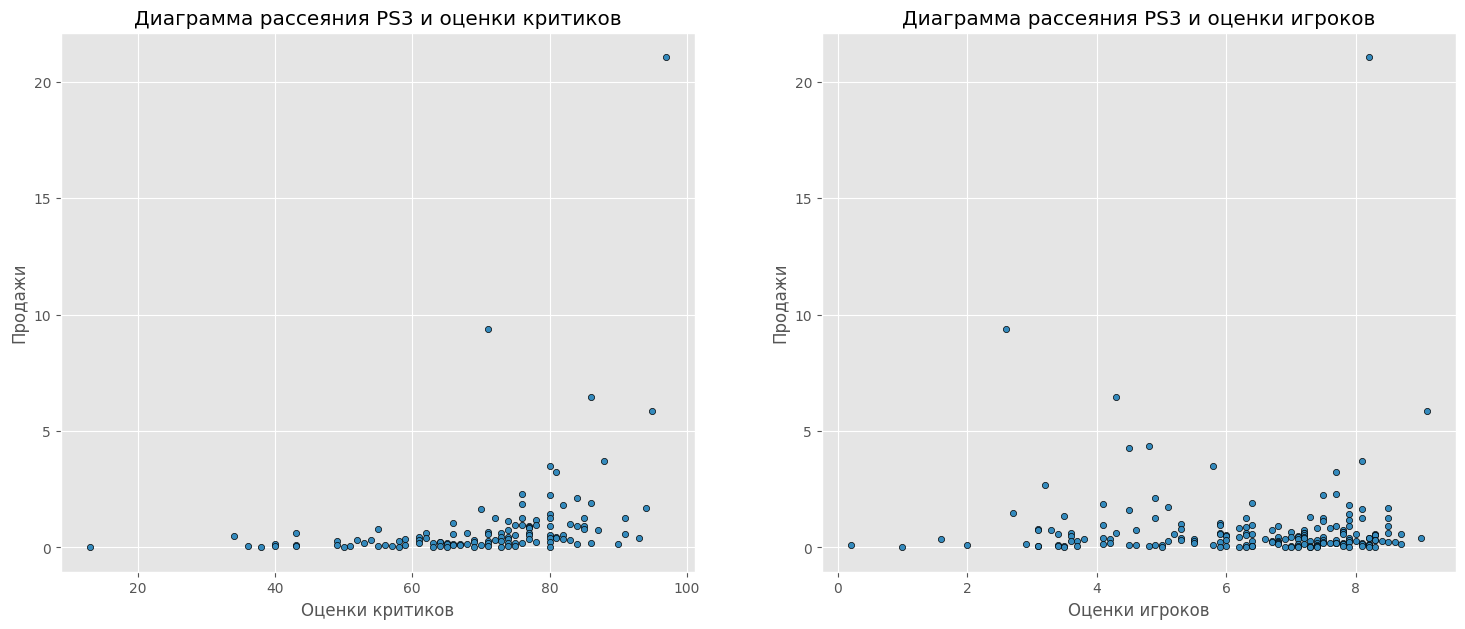

In [35]:
game_PS3_crit = period_df[(period_df['platform'] == 'PS3')&(period_df['critic_score']!= -1)]
game_PS3_user = period_df[(period_df['platform'] == 'PS3')&(period_df['user_score']!= -1)]

fig, axis = plt.subplots(1,2, figsize=(18,7))

game_PS3_crit.plot(kind='scatter',       
                   ax=axis[0], 
                   x='critic_score',
                   y='total_sales',
                   xlabel = 'Оценки критиков',
                   ylabel = 'Продажи',
                   title = 'Диаграмма рассеяния PS3 и оценки критиков',
                   ec='black')


game_PS3_user.plot(kind='scatter',
                    ax=axis[1],
                    x='user_score',
                    y='total_sales',
                    xlabel = 'Оценки игроков',
                    ylabel = 'Продажи',
                    title = 'Диаграмма рассеяния PS3 и оценки игроков',
                    ec='black')

print('Kорреляция между отзывами критиков и продажами PS3 =',
      game_PS3_crit['critic_score'].corr(game_PS3_crit['total_sales']))
print('Kорреляция между отзывами игроков и продажами PS3 =',
      game_PS3_user['user_score'].corr(game_PS3_user['total_sales']))

Kорреляция между отзывами критиков и продажами X360 = 0.35034454602286647
Kорреляция между отзывами игроков и продажами X360 = -0.011742185147181334


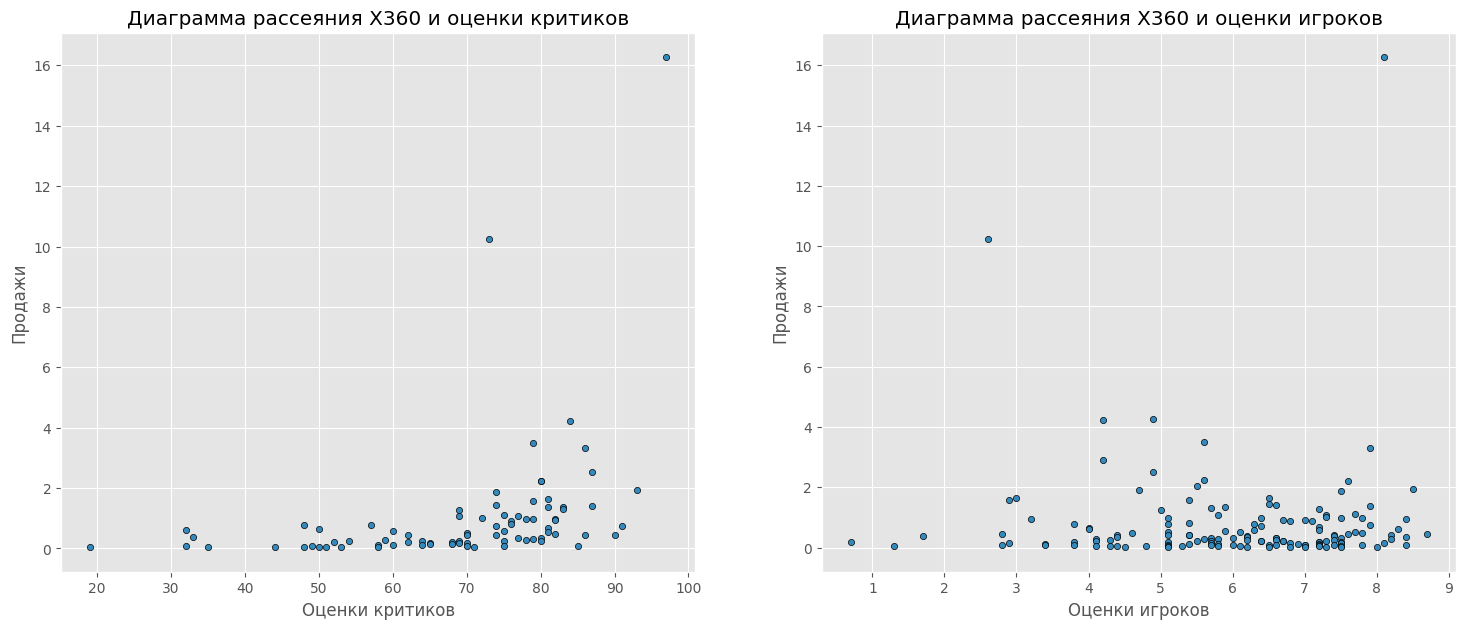

In [36]:
game_X360_crit = period_df[(period_df['platform'] == 'X360')&(period_df['critic_score']!= -1)]
game_X360_user = period_df[(period_df['platform'] == 'X360')&(period_df['user_score']!= -1)]

fig, axis = plt.subplots(1,2, figsize=(18,7))

game_X360_crit.plot(kind='scatter',       
                   ax=axis[0], 
                   x='critic_score',
                   y='total_sales',
                   xlabel = 'Оценки критиков',
                   ylabel = 'Продажи',
                   title = 'Диаграмма рассеяния X360 и оценки критиков',
                   ec='black')


game_X360_user.plot(kind='scatter',
                    ax=axis[1],
                    x='user_score',
                    y='total_sales',
                    xlabel = 'Оценки игроков',
                    ylabel = 'Продажи',
                    title = 'Диаграмма рассеяния X360 и оценки игроков',
                    ec='black')

print('Kорреляция между отзывами критиков и продажами X360 =',
      game_X360_crit['critic_score'].corr(game_X360_crit['total_sales']))
print('Kорреляция между отзывами игроков и продажами X360 =',
      game_X360_user['user_score'].corr(game_X360_user['total_sales']))

Kорреляция между отзывами критиков и продажами XOne = 0.41699832800840153
Kорреляция между отзывами игроков и продажами XOne = -0.06892505328279418


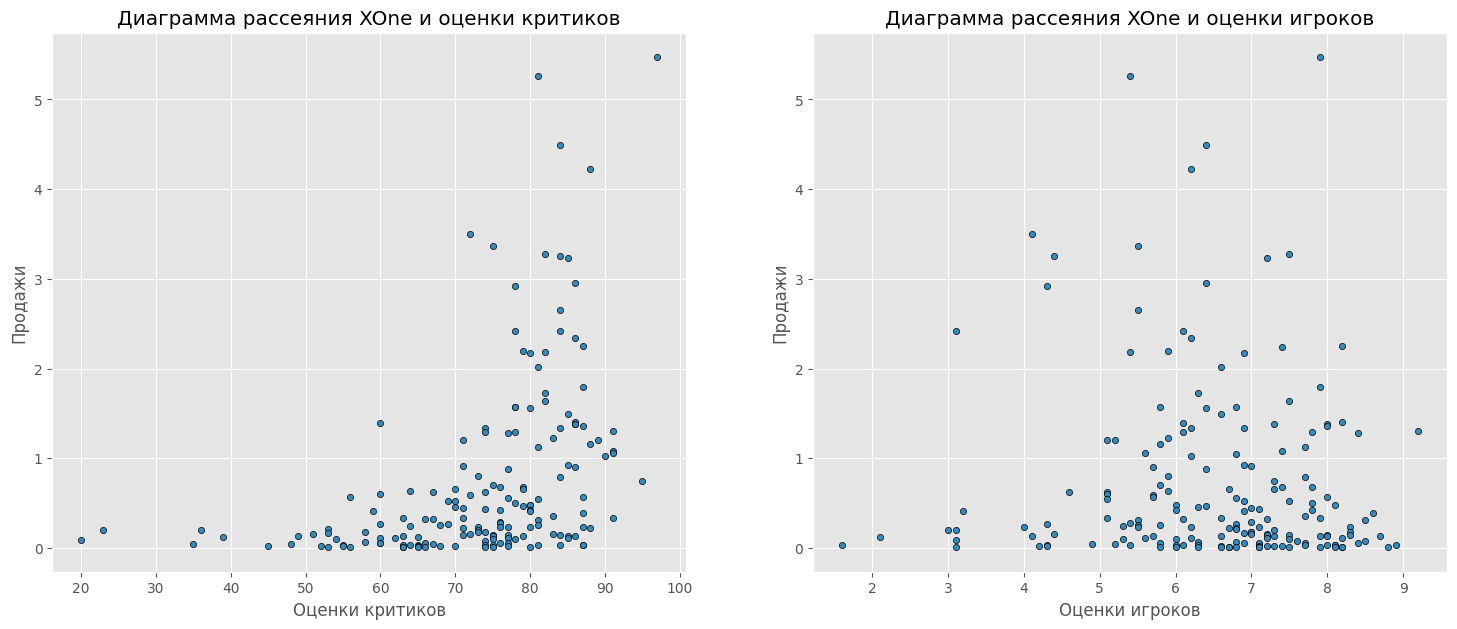

In [37]:
game_XOne_crit = period_df[(period_df['platform'] == 'XOne')&(period_df['critic_score']!= -1)]
game_XOne_user = period_df[(period_df['platform'] == 'XOne')&(period_df['user_score']!= -1)]

fig, axis = plt.subplots(1,2, figsize=(18,7))

game_XOne_crit.plot(kind='scatter',       
                   ax=axis[0], 
                   x='critic_score',
                   y='total_sales',
                   xlabel = 'Оценки критиков',
                   ylabel = 'Продажи',
                   title = 'Диаграмма рассеяния XOne и оценки критиков',
                   ec='black')


game_XOne_user.plot(kind='scatter',
                    ax=axis[1],
                    x='user_score',
                    y='total_sales',
                    xlabel = 'Оценки игроков',
                    ylabel = 'Продажи',
                    title = 'Диаграмма рассеяния XOne и оценки игроков',
                    ec='black')

print('Kорреляция между отзывами критиков и продажами XOne =',
      game_XOne_crit['critic_score'].corr(game_XOne_crit['total_sales']))
print('Kорреляция между отзывами игроков и продажами XOne =',
      game_XOne_user['user_score'].corr(game_XOne_user['total_sales']))

Существует прямая неявная взаимосвязь между отзывами критиков и продажами игр. По остальным платформам, взаимосвязи оценок пользователей и продаж игр на платформах почти не прослеживается коэффициент корреляции мал.

**3.8 Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

,genre,total_sales
0,Action,321.87
1,Shooter,232.98
2,Sports,150.65
3,Role-Playing,145.89
4,Misc,62.82
5,Platform,42.63
6,Racing,39.89
7,Fighting,35.31
8,Adventure,23.64
9,Simulation,21.76


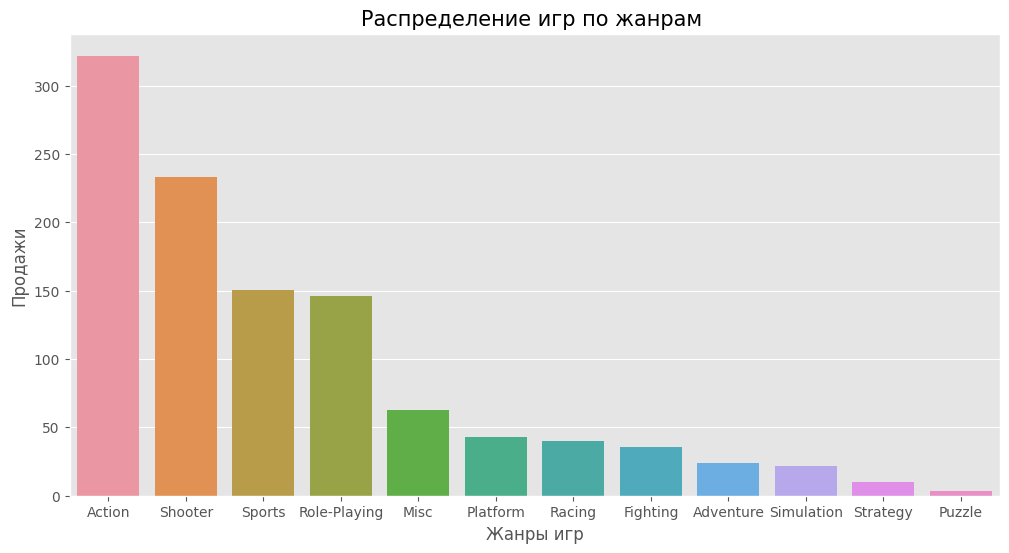

In [38]:
distr_genre = period_df.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)
display(distr_genre)
plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=distr_genre, x='genre', y='total_sales')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12)
plt.show()

**Жанр 'Action', Sports, Shooter самые популярные. 'Puzzle', 'Strategy' последнем месте. Однако не стоит забывать, о масштабности игр, их бюджетах и прочее**

,genre,total_sales
0,Shooter,0.450
1,Sports,0.240
2,Platform,0.225
3,Role-Playing,0.125
4,Fighting,0.125
5,Racing,0.120
6,Action,0.110
7,Simulation,0.100
8,Misc,0.100
9,Strategy,0.080


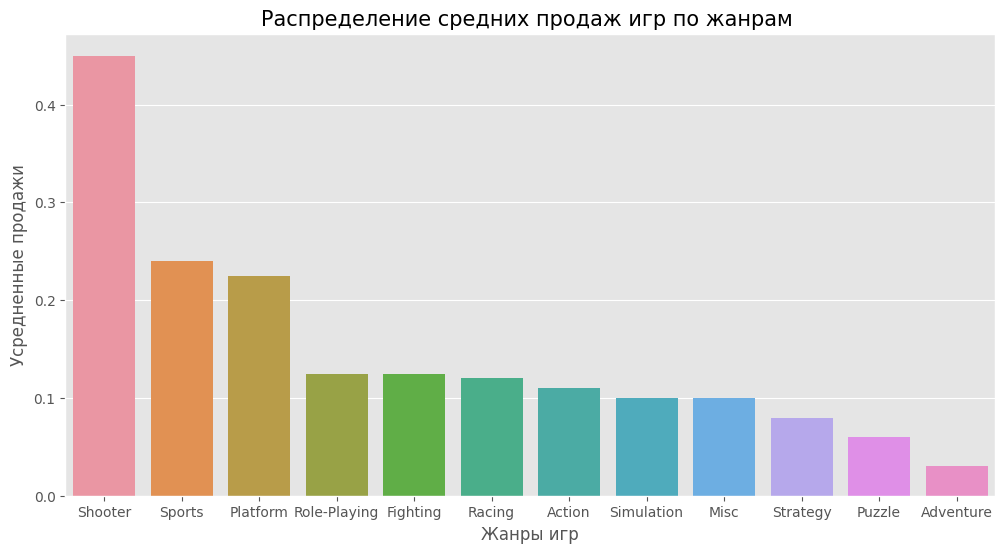

In [39]:
distr_genre_median = period_df.pivot_table(index='genre',
                                           values='total_sales',
                                           aggfunc='median').sort_values(
    by='total_sales',
    ascending=False).reset_index().rename_axis(None,
                                               axis=1)

display(distr_genre_median)
plt.figure(figsize=(12,6))
plt.title('Распределение средних продаж игр по жанрам ',fontsize=15)
sns.barplot(data=distr_genre_median, x='genre', y='total_sales')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Усредненные продажи',fontsize=12)
plt.show()

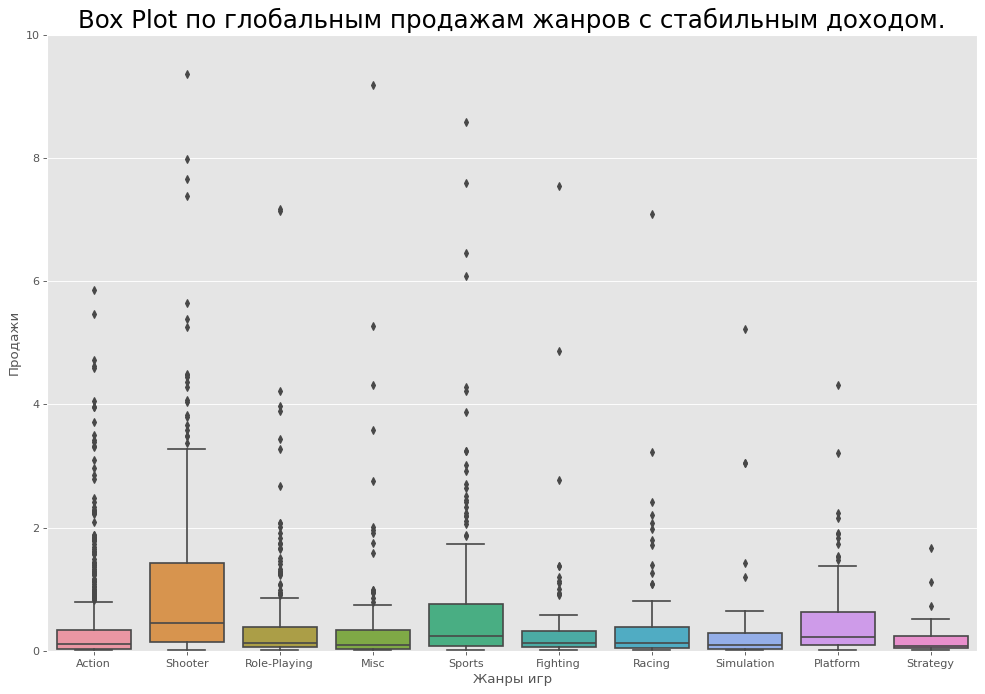

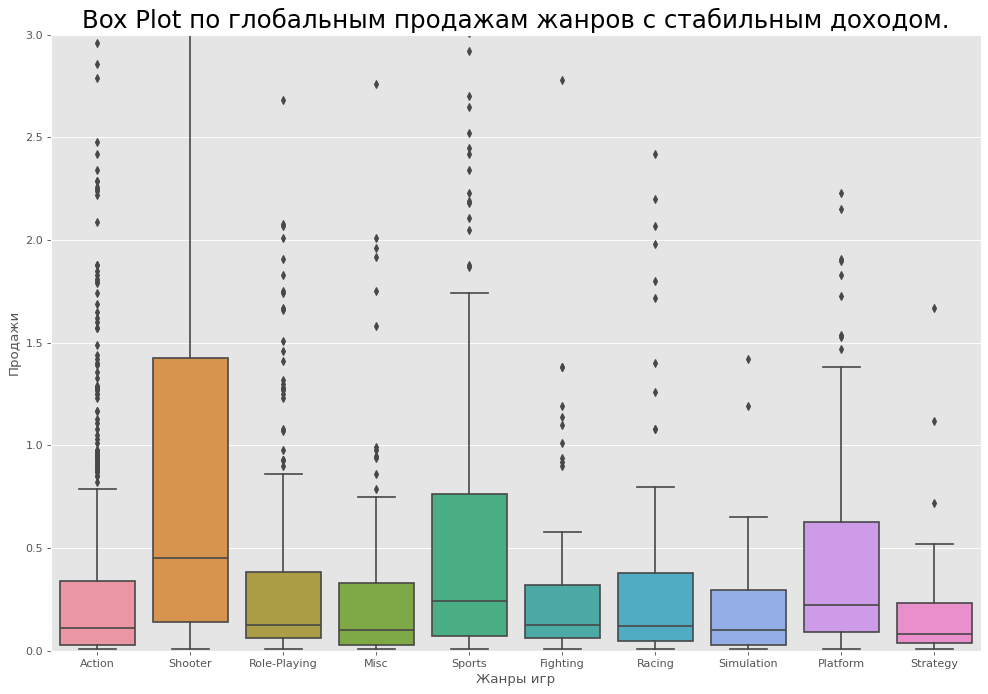

genre,Action,Fighting,Misc,Platform,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
count,766.000000,80.000000,155.000000,74.000000,85.000000,292.000000,187.000000,62.000000,214.000000,56.000000
mean,0.420196,0.441375,0.405290,0.576081,0.469294,0.499623,1.245882,0.350968,0.703972,0.180000
std,1.253909,1.048883,1.007985,0.806808,0.964101,1.353164,2.014107,0.849163,1.219237,0.279441
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.030000,0.060000,0.030000,0.090000,0.050000,0.060000,0.140000,0.030000,0.070000,0.040000
50%,0.110000,0.125000,0.100000,0.225000,0.120000,0.125000,0.450000,0.100000,0.240000,0.080000
75%,0.337500,0.322500,0.330000,0.627500,0.380000,0.382500,1.425000,0.295000,0.765000,0.232500
max,21.050000,7.550000,9.180000,4.320000,7.090000,14.600000,14.630000,5.220000,8.580000,1.670000


In [40]:
top_10 = period_df[period_df['genre'].isin(list(distr_genre_median.genre[:10]))]

# Draw Plot
plt.figure(figsize=(15,10), dpi= 80)
ax = sns.boxplot(x='genre', y='total_sales', data=top_10)

# Decoration
plt.title('Box Plot по глобальным продажам жанров с стабильным доходом.', fontsize=22)
ax.set_ylim(0,10)
plt.ylabel('Продажи')
plt.xlabel('Жанры игр')
plt.show()

# Draw Plot
plt.figure(figsize=(15,10), dpi= 80)
ax = sns.boxplot(x='genre', y='total_sales', data=top_10)

# Decoration
plt.title('Box Plot по глобальным продажам жанров с стабильным доходом.', fontsize=22)
ax.set_ylim(0,3)
plt.ylabel('Продажи')
plt.xlabel('Жанры игр')
plt.show()

top_10.groupby('genre')['total_sales'].describe().T

**Вывод: Самые высокие продажи: Action с суммарным кол-вом продаж 1526 млн копий; Sports с суммарным оборотом продаж 1131 млн проданных копий; Shooter продажи равны 913 млн копий; за ними идут Role-Playing и Misc с общим кол-вом продаж 731 и 718 млн проданных копий.Самые низкие продажи у жанров Strategy 115 млн копий, Puzzle 138 млн копий, Adventure 183 млн копий.**

**Выводы по блоку 3:**
-  Самыме прибыльные платформы: PS4, 3DS, PS3, X360, XOne
- Самыми прибыльными жанрами можно считать Action, Shooter, Role-Playing, Sports и Misc.
- С стабильным доходом жанры: Shooter, Platform, Sports, Racing и Fighting
- На период 2012-2016 год не пользуются популярностью Adventure, Simulation ,Strategy и Puzzle.


**На 2017 год ожидается подъем продаж по платформам PS4, XOne и 3DS в жанрах: Shooter, Platform,Role-Playing, Sports.**

### <a id="title4">Шаг 4. Составьте портрет пользователя каждого региона</a>

**4.1 Определите для пользователя каждого региона (NA, EU, JP):**

**4.1.1 Самые популярные платформы (топ-5). Опишите различия в долях продаж.**

In [41]:
na_platform = period_df.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(
    by='na_sales', ascending=False).rename_axis(None, axis=1).head(5)
display(na_platform)

eu_platform = period_df.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(
    by='eu_sales', ascending=False).rename_axis(None, axis=1).head(5)
display(eu_platform)

jp_platform = period_df.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(
    by='jp_sales', ascending=False).rename_axis(None, axis=1).head(5)
display(jp_platform)

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


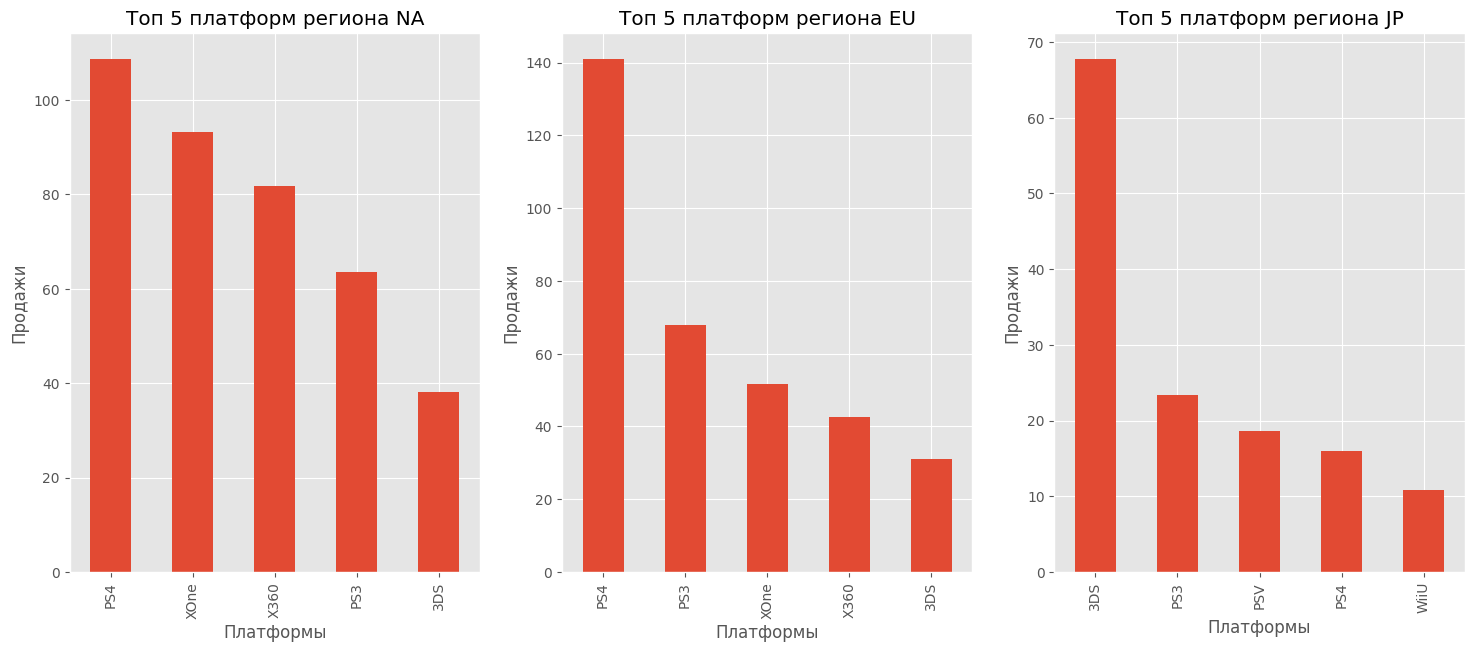

In [42]:
fig, axis = plt.subplots(1,3, figsize=(18,7))

na_platform.plot(kind='bar', 
                 ax=axis[0],
                 grid = True,
                 title = 'Топ 5 платформ региона NA',
                 xlabel = 'Платформы',
                 ylabel = 'Продажи',
                 legend = ''
                )

eu_platform.plot( kind='bar',
                 ax=axis[1],
                 grid = True,
                 title = 'Топ 5 платформ региона EU',
                 xlabel = 'Платформы',
                 ylabel = 'Продажи',
                 legend = '')

jp_platform.plot( kind='bar',
                 ax=axis[2],
                 grid = True,
                 title = 'Топ 5 платформ региона JP',
                 xlabel = 'Платформы',
                 ylabel = 'Продажи',
                 legend = '')

plt.show()


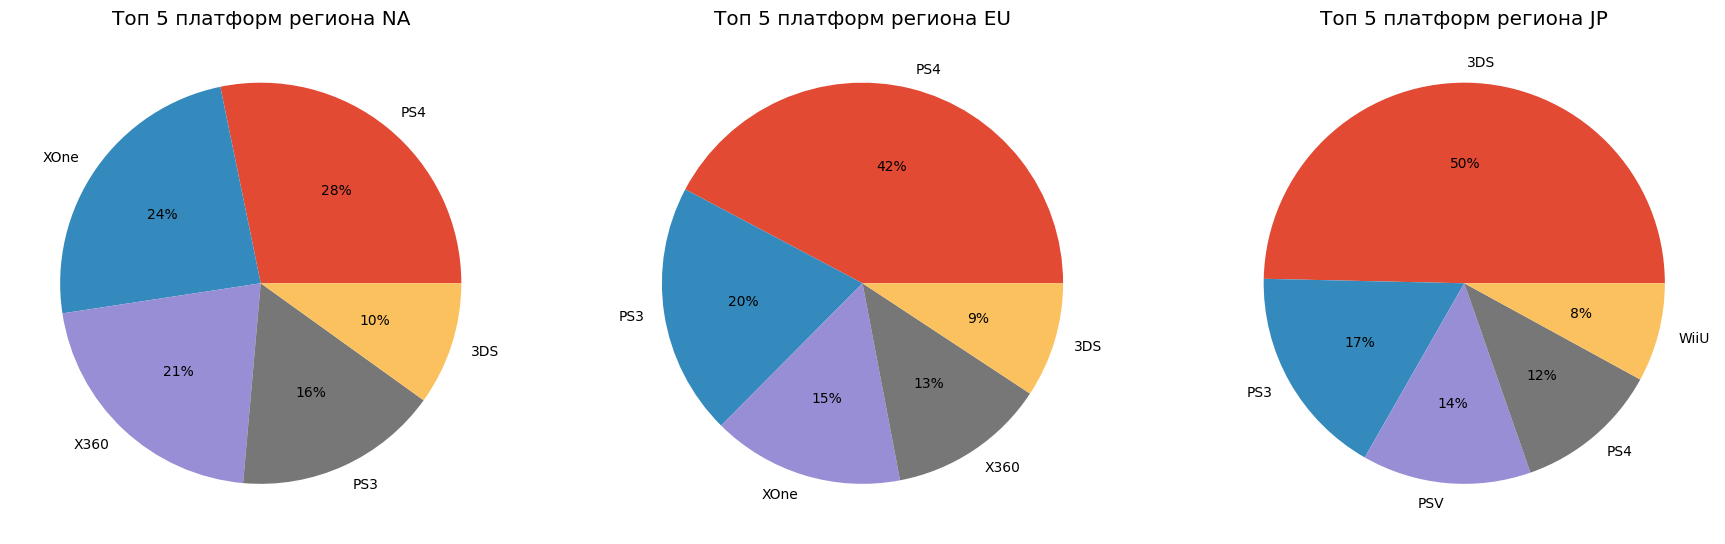

In [43]:
fig, axis = plt.subplots(1,3, figsize=(22,9))
na_platform.plot.pie(y ='na_sales', 
                     title = 'Топ 5 платформ региона NA',
                     ax=axis[0],
                     ylabel ='',
                     legend = '',
                     autopct='%1.0f%%');
eu_platform.plot.pie(y ='eu_sales',
                     title = 'Топ 5 платформ региона EU',
                     ax=axis[1],
                     ylabel ='',
                     legend ='',
                     autopct='%1.0f%%');
jp_platform.plot.pie(y='jp_sales',
                     title = 'Топ 5 платформ региона JP',
                     ax=axis[2],
                     ylabel ='',
                     legend ='',
                     autopct='%1.0f%%');
plt.show()

- Топ 5 по Северной Америке: PS4, XOne, X360, PS3, 3DS	
- Топ 5 по Европейскому региону: PS4, PS3, XOne, X360, 3DS
- Топ 5 по Японии: 3DS, PS3, PSV, PS4, WiiU	

**На 2017 год ожидается подъем продаж по PS4, XOne и 3DS на рынках Северной Америки, Европпы. На Японском рынке из нового 3DS, PS4, все еще актуален PS3 и WiiU**

**4.1.2 Самые популярные жанры (топ-5). Поясните разницу.**

In [44]:
na_ganres = period_df.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(
    by='na_sales', ascending=False).rename_axis(None, axis=1).head(5)

eu_ganres = period_df.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(
    by='eu_sales', ascending=False).rename_axis(None, axis=1).head(5)

jp_ganres = period_df.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(
    by='jp_sales', ascending=False).rename_axis(None, axis=1).head(5)
display(na_ganres, jp_ganres, eu_ganres)

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


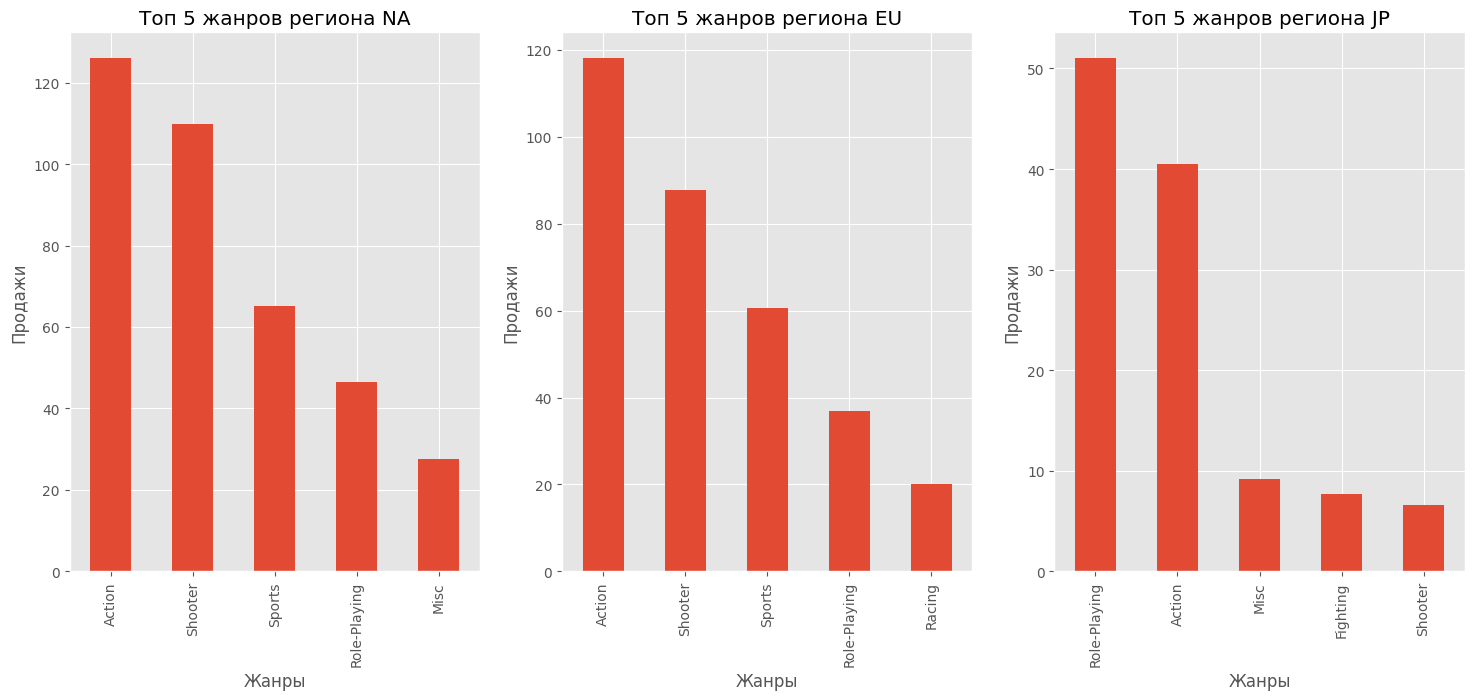

In [45]:
fig, axis = plt.subplots(1,3, figsize=(18,7))

na_ganres.plot(kind='bar', 
                 ax=axis[0],
                 grid = True,
                 title = 'Топ 5 жанров региона NA',
                 xlabel = 'Жанры',
                 ylabel = 'Продажи',
                 legend = ''
                )
eu_ganres.plot( kind='bar',
                 ax=axis[1],
                 grid = True,
                 title = 'Топ 5 жанров региона EU',
                 xlabel = 'Жанры',
                 ylabel = 'Продажи',
                 legend = '')
jp_ganres.plot( kind='bar',
                 ax=axis[2],
                 grid = True,
                 title = 'Топ 5 жанров региона JP',
                 xlabel = 'Жанры',
                 ylabel = 'Продажи',
                 legend = '')

plt.show()

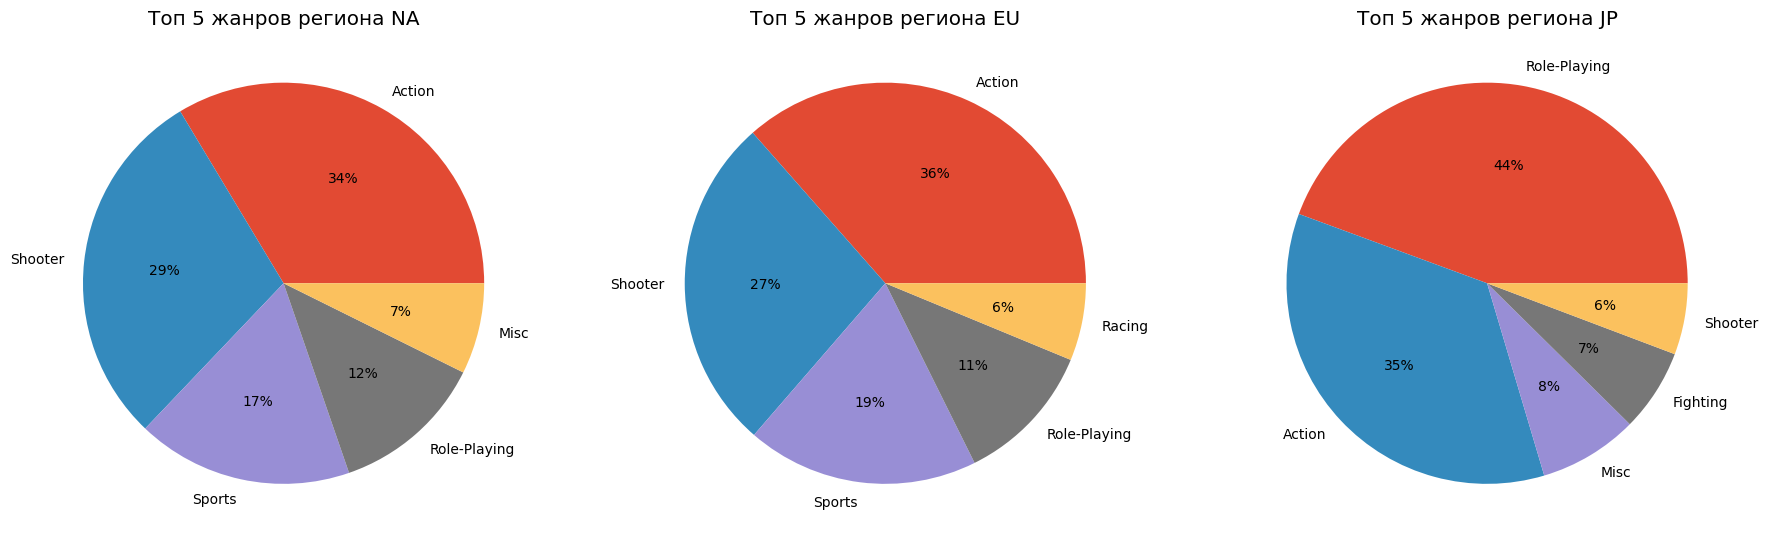

In [46]:
fig, axis = plt.subplots(1,3, figsize=(22,9))
na_ganres.plot.pie(y ='na_sales', 
                     title = 'Топ 5 жанров региона NA',
                     ax=axis[0],
                     ylabel ='',
                     legend = '',
                     autopct='%1.0f%%');
eu_ganres.plot.pie(y ='eu_sales',
                     title = 'Топ 5 жанров региона EU',
                     ax=axis[1],
                     ylabel ='',
                     legend ='',
                     autopct='%1.0f%%');
jp_ganres.plot.pie(y='jp_sales',
                     title = 'Топ 5 жанров региона JP',
                     ax=axis[2],
                     ylabel ='',
                     legend ='',
                     autopct='%1.0f%%');
plt.show()


Самые популярные жанры (топ-5)

- EU: Action, Shooter, Sports, Role-Playing, Racing
- JP: Role-Playing, Action, Misc, Fighting, Shooter	
- NA: Action, Shooter,  Sports, Role-Playing, Misc

**4.1.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [47]:
ESRB_transkript = {'E': 'без ограничений', 'M': '+ 17', 
                   'T': '13-19', 'E10+': '+ 10 лет', 
                   'K-A': 'без ограничений', 'No_ESRB': 'не присвоена'}

In [48]:
period_df['ESRB_transkript'] = period_df[period_df['rating'].notnull()]['rating'].map(ESRB_transkript)
period_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,ESRB_transkript
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,+ 17
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,+ 17
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,No_ESRB,14.63,не присвоена
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,No_ESRB,14.60,не присвоена
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,+ 17


In [49]:
na_esrb = period_df.pivot_table(index='ESRB_transkript', values='na_sales', aggfunc='sum').sort_values(
    by='na_sales', ascending=False).rename_axis(None, axis=1).head(5)
display(na_esrb)

eu_esrb = period_df.pivot_table(index='ESRB_transkript', values='eu_sales', aggfunc='sum').sort_values(
    by='eu_sales', ascending=False).rename_axis(None, axis=1).head(5)
display(eu_esrb)

jp_esrb = period_df.pivot_table(index='ESRB_transkript', values='jp_sales', aggfunc='sum').sort_values(
    by='jp_sales', ascending=False).rename_axis(None, axis=1).head(5)
display(jp_esrb)

,na_sales
ESRB_transkript,
+ 17,165.21
не присвоена,89.42
без ограничений,79.05
+ 10 лет,54.24
13-19,49.79


,eu_sales
ESRB_transkript,
+ 17,145.32
без ограничений,83.36
не присвоена,78.91
+ 10 лет,42.69
13-19,41.95


,jp_sales
ESRB_transkript,
не присвоена,85.05
13-19,20.59
без ограничений,15.14
+ 17,14.11
+ 10 лет,5.89


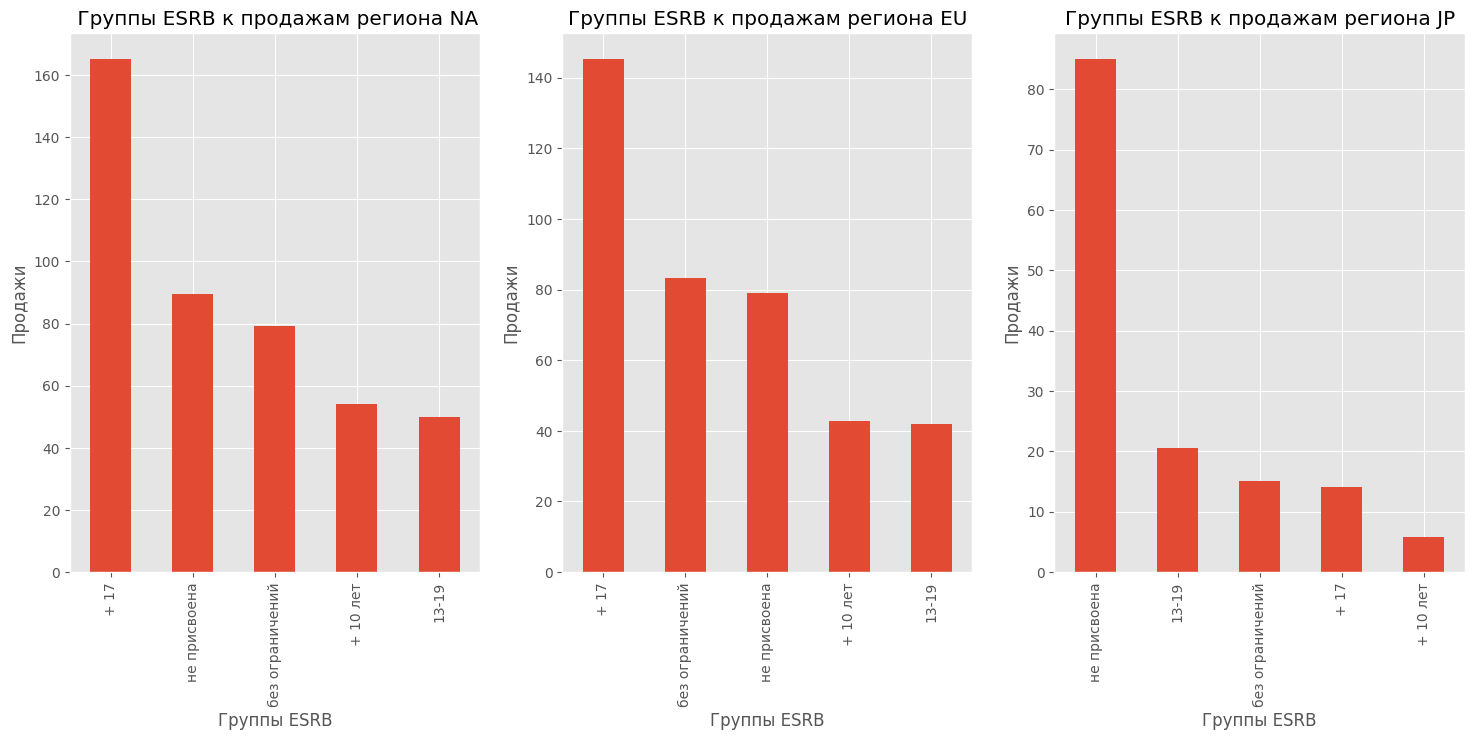

In [50]:
fig, axis = plt.subplots(1,3, figsize=(18,7))

na_esrb.plot(kind='bar', 
                 ax=axis[0],
                 grid = True,
                 title = ' Группы ESRB к продажам региона NA',
                 xlabel = 'Группы ESRB',
                 ylabel = 'Продажи',
                 legend = ''
                )
eu_esrb.plot( kind='bar',
                 ax=axis[1],
                 grid = True,
                 title = 'Группы ESRB к продажам региона EU',
                 xlabel = 'Группы ESRB',
                 ylabel = 'Продажи',
                 legend = '')
jp_esrb.plot( kind='bar',
                 ax=axis[2],
                 grid = True,
                 title = 'Группы ESRB к продажам региона JP',
                 xlabel = 'Группы ESRB',
                 ylabel = 'Продажи',
                 legend = '')

plt.show()

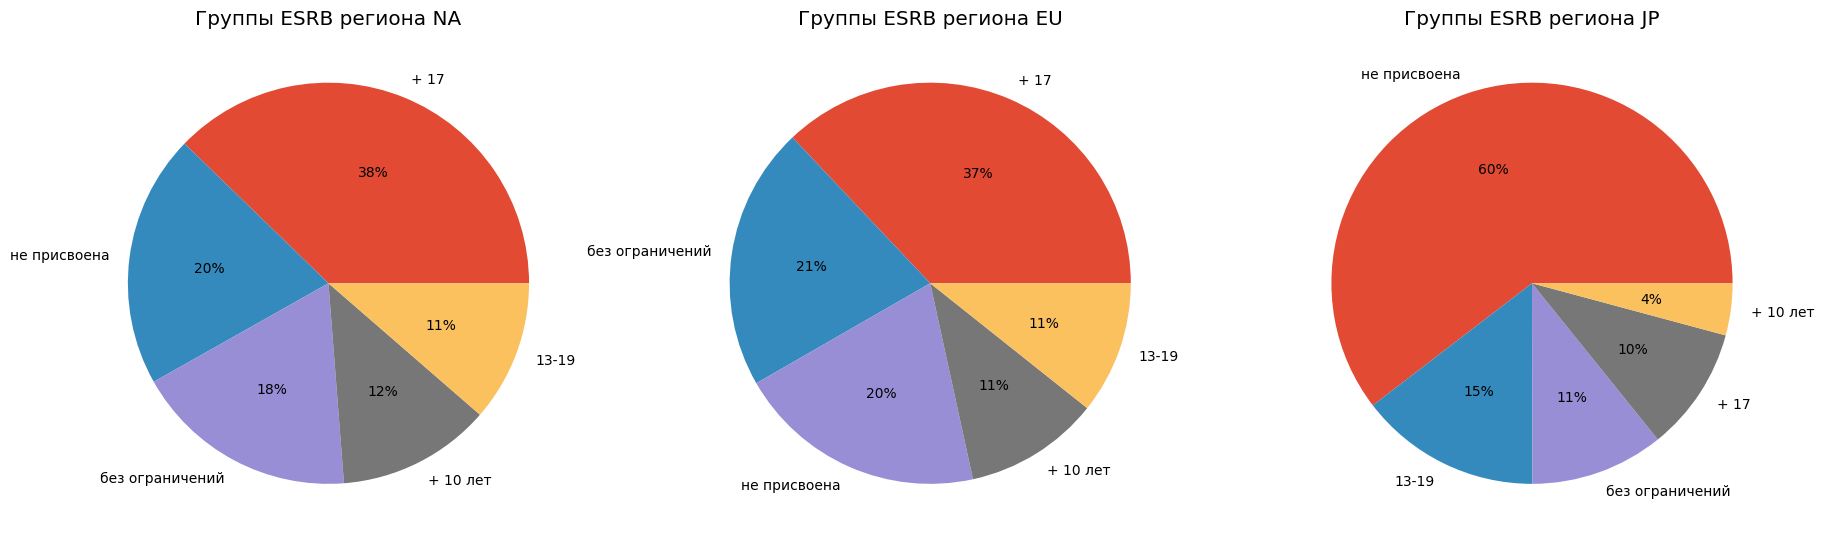

In [51]:
fig, axis = plt.subplots(1,3, figsize=(22,9))
na_esrb.plot.pie(y ='na_sales', 
                     title = 'Группы ESRB региона NA',
                     ax=axis[0],
                     ylabel ='',
                     legend = '',
                     autopct='%1.0f%%');
eu_esrb.plot.pie(y ='eu_sales',
                     title = 'Группы ESRB региона EU',
                     ax=axis[1],
                     ylabel ='',
                     legend ='',
                     autopct='%1.0f%%');
jp_esrb.plot.pie(y='jp_sales',
                     title = 'Группы ESRB региона JP',
                     ax=axis[2],
                     ylabel ='',
                     legend ='',
                     autopct='%1.0f%%');
plt.show()

Европе и Северной Америке игры с рейтингом '+ 17'- почти половина всех продаж. Проекты с данным рейтингом могут содержать жестокое насилие. После следуют игры с рейтингом 'без ограничений'/ 'не присвоена'.
В Японии большая часть продаж игр приходится без рейтинга, далее идет ‘13-19' («Teen») — «Подросткам». 


### <a id="title5">Шаг 5. Проверьте гипотезы</a>

In [52]:
stat_df = period_df.copy()

In [53]:
stat_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,ESRB_transkript
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,+ 17
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,+ 17
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,No_ESRB,14.63,не присвоена
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,No_ESRB,14.60,не присвоена
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,+ 17


**5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;**

- нулевая гипотеза = средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- альтернативная гипотеза = средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

In [54]:
xone_hypot = stat_df[(stat_df['platform'] == 'XOne')&(stat_df['user_score'] != -1)]['user_score']
pc_hypot = stat_df[(stat_df['platform'] == 'PC')&(stat_df['user_score'] != -1)]['user_score']

alpha = 0.01

results = st.ttest_ind(xone_hypot.dropna(), pc_hypot.dropna(), equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print(f'ср.значение Xone {xone_hypot.mean()}, a дисперсия {variance(xone_hypot)} ')
print(f'ср.значение PS {pc_hypot.mean()}, a дисперсия {variance(pc_hypot)} ')

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу
ср.значение Xone 6.521428571428572, a дисперсия 1.9069968429360695 
ср.значение PS 6.2696774193548395, a дисперсия 3.0358927524088815 


**Мы не  отвергаем нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC одинаковые не получилось отвергнуть**

**5.2 cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

- нулевая гипотеза = средние пользовательские рейтинги жанров Action и Sports одинаковые.
- альтернативная гипотеза = средние пользовательские рейтинги жанров Action и Sports отличаются между собой.

In [55]:
action_ratings = stat_df[(stat_df['genre'] == 'Action')&(stat_df['user_score'] != -1)]['user_score']
pc_ratings = stat_df[(stat_df['genre'] == 'Sports')&(stat_df['user_score'] != -1)]['user_score']

alpha = 0.01

results = st.ttest_ind(action_ratings.dropna(), pc_ratings.dropna(), equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print(f'ср.значение Action {action_ratings.mean()}, a дисперсия {variance(action_ratings)} ')
print(f'ср.значение Sports {pc_ratings.mean()}, a дисперсия {variance(pc_ratings)} ')

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу
ср.значение Action 6.837532133676092, a дисперсия 1.7693609042482707 
ср.значение Sports 5.238124999999999, a дисперсия 3.180612814465409 


**Отвергаем нулевую гипотезу - нулевая гипотеза = средние пользовательские рейтинги жанров Action и Sports одинаковые.**

**Проверили гипотезы по функции ttest_ind, вычисляющей t-тест двух независимых выборок**

In [56]:
#Примеры другого alpha
alpha = 0

results = st.ttest_ind(action_ratings.dropna(), pc_ratings.dropna(), equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Не получилось отвергнуть нулевую гипотезу


**В обоих случаях выборки независимы между собой, из лекций больше всего подходит t-критерий Стьюдента. Выбор уровня значимости при проверке статистических гипотез противоречив. С одной стороны, большой уровень значимости дает большую уверенность в истинности альтернативной гипотезы. Но при этом возрастает риск не отвергнуть ложную нулевую гипотезу (ошибка второго рода).**

### <a id="title6">Шаг 6. Напишите общий вывод</a>

**Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Дата сет состоит из 16715 строк, 11 колонок. Немного поработав с данными, убрав пропущенные значения, аномалии выяснили:**
- C 90-х годов количество игр начинает ежегодно расти быстрыми темпами. Вплоть до 2008 был необычайной рост. С 2010 общий интерес снижается и падает до 2016 года.
- Xbox, PlayStation, Nintendo, PC основные топовые платформы по предпочтениям. 
- С 2005 года, а именно этот год выбран как фокусировка внимания в датасете ситуация с платформами почти не меняется. Есть некоторые аномалии, нехарактерные данные по продажам за период у Nintendo, но в целом ситуация прогнозируема.
- Отзывы критиков разняться, но почти не влияют на продажи, аналогичная ситуация с отзывами игроков.
- Жанры весьма предсказуемы, в целом это Action, Sports, Shooter.

**Игрок из Северной Америки обожает Xbox, рубиться в жанрах Action , Sports и под настроение Misc. Европейский игрок обожает все также, с тем лишь отличием, что его любая платформа от SONY.
Японский игрок обожает портативки, рубить на каноничном PC, жанры очень интересные Role-Playing, Action и под настроение Misc.
рейтинг ESRB почти не влияет на продажи, оно и понятно, в целом любая компания стремиться получить прибыль с самого широкого охвата аудитории. Поэтому все старается попасть в рейтинг 'без ограничений'.  Вечное противостояние Microsoft и Sony, подтверждает их средние оценки от игроков. А жанры Action и Sports близки, но все же не одинаковы.
В обоих случаях выборки независимы между собой. А выбор уровня значимости при проверке статистических гипотез противоречив.**


Пользователи Штатов и Европы любят шутеры, это относиться к платформе PS4 и XOne, но американские предпочитают экшен, в топе у европейцев входят гонки, а у представителей штатов есть файтинги. Портрет японского игрока полностью отличается, т.к. главный игровой жанр - ролевые игры, а основная консоль - 3DS. По большей части игровые жанры для определённого региона соответствуют менталитету и культуре стран, консоли же подбираются исходя из основных жанров. Правда некоторые платформы имеют множество жанров, что позволяет закрыть много разных регионов. Рейтинг ESRB влияет на европейских и американских игроков, кроме региона - Япония, здесь суммарные продажи у игр без рейтинга выше или просто нет этой ESRB.

Рекомендации по продвижению!

| страна | платформа      |жанр для рекламы     |
|------- |----------------|---------------------|
| Америка| PS4 и XOne     |шутеры, экшен        |
|Европа  | PS4 и XOne     |шутеры, экшен, спорт |
|Япония  |3DS, PS4 и XOne |ролевые игры, экшен  |


В Европе и Северной Америке надо планировать большую часть бюджета на игры рейтинга М, они  всегда самые большие в продажах. Остальную часть бюджета можно заложить на рекламу  с рейтингом «E10+» — «Для всех от 10 лет и старше» в этих регионах.

Для рынка Северной Америки надо планировать рекламную компанию игр жанров Action, Shooter, Sports это ТОП-3 наиболее продаваемых жанра за последние 5 лет в этом регионе. Платформы PS4-5 и Хbox One/Xbox One S/Xbox и более новые версии имеют популярность. Игроки из Америки предпочитают игры этих платформ. Также в бюджет можно рассмотреть возможность рекламы Nintendo.

Европейские геймеры такие же, как и Американцы, рекомендации те же.

В Японии большая часть продаж игр приходится без рейтинга, поэтому упор лучще делать на жанры, далее рейтинг Т. «T» («Teen») — «Подросткам»востребованные. 

Для Японского рынка  проводить рекламные компании игр жанра Role-Playing и Action, большинство геймеров этого региона покупали игры этих направлений, на базе платформ 3DS и PS3-PS4.